# Healthcare Fraud --- II Models 

# Objectives
This notebook will conduct an analysis of the Fraud, Waste, and Abuse of Medical resources. I will focus on detecting any hospital that may abuse the resources compared to its peers of the same features, location, or each diagnosis group.

# Dataset
The dataset is from the Medicare Inpatient Hospitals by Geography and service that provides information on hospital discharges. Please see more information in "Healthcare Fraud --- I EDA&Feature Engineering".

# Models
I will perform various techniques to identify fraud in the healthcare industry and follow modeling procedures for the model development, assessment, and interpretation of the results. 
* Model development
* Threshold determination
* Descriptive statistics of the normal and abnormal groups

Python Outlier Detection (PyOD) module includes many supervised and unsupervised algorithms to detect anomalies. I will apply the Principal Component Analysis (PCA) in this notebook.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation-" data-toc-modified-id="Data-Preparation--1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation <a class="anchor" id="Section_1" rel="nofollow"></a></a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Models---PCA-in-the-PyOD-module" data-toc-modified-id="Models---PCA-in-the-PyOD-module-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Models - PCA in the PyOD module</a></span><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Model-development" data-toc-modified-id="Model-development-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Model development</a></span></li><li><span><a href="#Threshold-determination" data-toc-modified-id="Threshold-determination-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Threshold determination</a></span></li><li><span><a href="#Descriptive-statistics-of-the-normal-and-abnormal-groups" data-toc-modified-id="Descriptive-statistics-of-the-normal-and-abnormal-groups-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Descriptive statistics of the normal and abnormal groups</a></span></li><li><span><a href="#Outliers-Identified-by-Multiple-Models" data-toc-modified-id="Outliers-Identified-by-Multiple-Models-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Outliers Identified by Multiple Models</a></span></li></ul></li></ul></li></ul></div>

In [99]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.options.display.float_forma
t = '{:.2f}'.format

## Data Preparation <a class="anchor" id="Section_1"></a>
Dataset is prepared from last module. 

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from pyod.models.hbos import HBOS

In [101]:
#Loading Data
path = '/Users/Edwina/Desktop/2022fall/5420/week6'
df = pd.read_csv(path + '/data_healthcare.csv')

In [102]:
#df.describe()
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 42 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        163065 non-null  int64  
 1   DRG                               163065 non-null  object 
 2   Provider_Id                       163065 non-null  int64  
 3   Provider_Name                     163065 non-null  object 
 4   Provider_StreetAddress            163065 non-null  object 
 5   Provider_City                     163065 non-null  object 
 6   Provider_State                    163065 non-null  object 
 7   Provider_Zipcode                  163065 non-null  int64  
 8   Hospital_referral_region_desp     163065 non-null  object 
 9   Total_Discharges                  163065 non-null  int64  
 10  Average_Total_Payments            163065 non-null  float64
 11  Average_Medicare_Payment          163065 non-null  f

In [103]:
df.head(3)

,Unnamed: 0,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,...,ratio_MP_DRG_bin,AvgMedicarePayment_By_State_DRG,ratio_MP_State_DRG,ratio_MP_State_DRG_bin,AvgMedicarePayment_By_Region_DRG,ratio_MP_Region_DRG,ratio_MP_Region_DRG_bin,MTotalPayment_By_City,ratio_MTP_City_DRG,ratio_MTP_City_DRG_bin
0,0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,...,"(0.802, 0.917]",4585.965000,1.038763,"(0.977, 1.093]",4585.965000,1.038763,"(0.977, 1.093]",8316.949825,0.694634,"(0.534, 0.774]"
1,1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,...,"(0.802, 0.917]",4604.024615,1.080948,"(0.977, 1.093]",4604.024615,1.080948,"(0.977, 1.093]",6812.131224,0.849598,"(0.774, 1.305]"
2,2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,...,"(0.723, 0.802]",4604.024615,0.967369,"(0.873, 0.977]",4604.024615,0.967369,"(0.873, 0.977]",8881.752832,0.611923,"(0.534, 0.774]"


## Feature Selection

In [104]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)
#newdf.drop('Provider_Zipcode')
newdf = newdf.drop('Provider_Zipcode', axis=1)
newdf.shape

(163065, 25)

In [105]:
#X_train = newdf.copy()
features=['ratio_TP_DRG',
       'ratio_TP_State_DRG',
       'ratio_TP_Region_DRG',
       'ratio_D_DRG', 
       'ratio_D_States_DRG', 
       'ratio_D_Region_DRG',  'ratio_MP_DRG',
        'ratio_MP_State_DRG',
        'ratio_MP_Region_DRG',
        'ratio_MTP_City_DRG']
X_train = df[features]
#X_train = X_train[features]
X_train.head()

,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG
0,0.830000,1.005855,1.037810,2.921770,1.338235,1.338235,0.857428,1.038763,1.038763,0.694634
1,0.831484,1.007653,1.008540,0.449503,0.509804,0.509804,0.895762,1.080948,1.080948,0.849598
2,0.780824,0.946260,0.947092,0.770577,0.873950,0.873950,0.801642,0.967369,0.967369,0.611923
3,0.778325,0.943232,0.944062,0.802684,0.910364,0.910364,0.743211,0.896859,0.896859,0.593905
4,0.812916,0.985152,0.986018,0.577933,0.655462,0.655462,0.873215,1.053739,1.053739,0.726413


<AxesSubplot:>

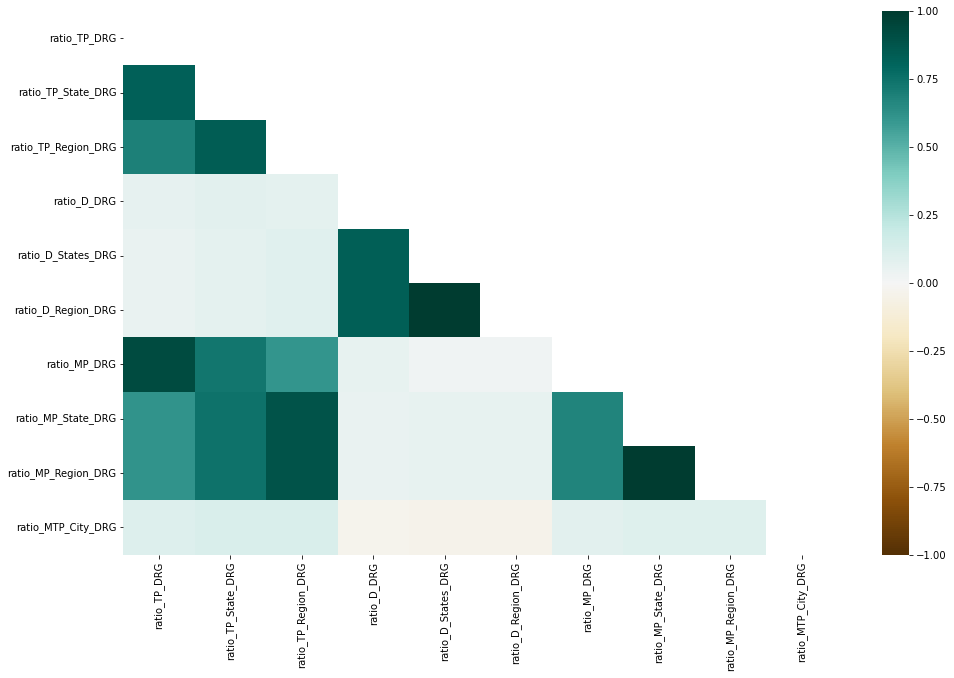

In [7]:
correlation = X_train.corr()
f, ax = plt.subplots(figsize=(16, 10))
mask = np.triu(np.ones_like(correlation, dtype=bool)) #mask for upper triangle
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation, mask = mask,vmin=-1, vmax=1,
            cmap = 'BrBG',
            #annot=True
           )

## Models - PCA in the PyOD module

### Overview
There are 3 types of unsupervised anomaly detection approaches, including proximity-based, distribution-based, or ensemble-based methods. Proximity-based algorithms identify outliers if its neighborhood does not have enough other points. 

One example using proximity-based algorithms is PCA, reducing to a lower dimensional without losing its main variance of raw data, espercailly in a dataset with large number of variables. It transforms a set of possibly correlated variables into a smaller number of linearly uncorrelated variables while retaining as much of the variance in the original dataset as possible. When reducing to a few principal dimensions, we can identify outliers because they are far away from other observations. When orthogonally projecting to the low-dimensional hyperplane, they will fall onto the eigenvectors with small eigenvalues. The eigenvectors with high eigenvalues capture most of the variance in the data.

### Modeling

#### Model development
The first model will use 5% contamination rate to construct model. It does not affect the calculation of the outlier scores and uses it to derive the threshold for the outlier scores.

In [106]:
from pyod.models.pca import PCA

pca = PCA(contamination=0.05)
pca.fit(X_train_norm)

# get the prediction labels and outlier scores of the training data
y_train_pred = pca.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = pca.decision_scores_  # .decision_scores_ yields the raw outlier scores for the training data
#y_train_scores = pca.decision_function(X_train)  # You also can use .decision_function()
#y_train_pred = pca.predict(X_train)  # You also can use .decision_function()

# Threshold for the defined comtanimation rate
print("The threshold for the defined comtanimation rate:", pca.threshold_)

The threshold for the defined comtanimation rate: 3.8059235968874016e+34


After declaring and fitting the model, I generated the outlier scores for the training data. It also shows the threshold at the assigned contamination rate. Any outlier score higher than the threshold is considered an outlier.

In [107]:
#pca.get_params()

[4.87396953e+00 2.75039882e+00 9.80545434e-01 7.58734505e-01
 3.03737023e-01 2.22913274e-01 9.45940208e-02 1.51687253e-02
 3.68418135e-33 2.76166374e-33]
[ 4.87396953  7.62436834  8.60491378  9.36364828  9.66738531  9.89029858
  9.9848926  10.00006133 10.00006133 10.00006133]


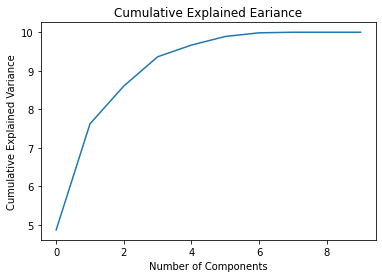

In [108]:
# explained variance ratio shows how much of the total variance is explained by each principal component.
print(pca.explained_variance_)
print(pca.explained_variance_.cumsum())

plt.plot(pca.explained_variance_.cumsum())
plt.title("Cumulative Explained Eariance")
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

[4.87393964e-01 2.75038195e-01 9.80539421e-02 7.58729852e-02
 3.03735160e-02 2.22911907e-02 9.45934407e-03 1.51686323e-03
 3.68415875e-34 2.76164681e-34]
[0.48739396 0.76243216 0.8604861  0.93635909 0.9667326  0.98902379
 0.99848314 1.         1.         1.        ]


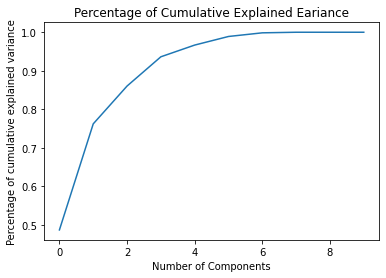

In [109]:
# explained variance ratio shows how much of the total variance is explained by each principal component.

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title("Percentage of Cumulative Explained Eariance")
plt.xlabel('Number of Components')
plt.ylabel('Percentage of cumulative explained variance')
plt.show()

The output below shows the first PC explains 48.73% variance, the second PC explains an additional 27.5%, the third 9.81%, and so on. The sum of the explained variance shall sum up to 100% for the ten principal components.

#### Threshold determination

In [110]:
print("The threshold for the defined comtanimation rate:" , pca.threshold_)

The threshold for the defined comtanimation rate: 3.8059235968874016e+34


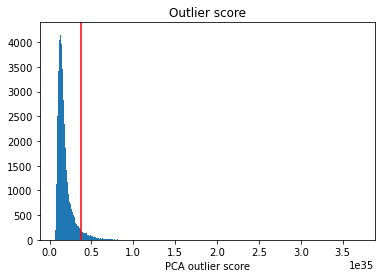

In [111]:
plt.hist(y_train_scores, bins='auto')  # arguments are passed to np.histogram
plt.title("Outlier score")
plt.xlabel('PCA outlier score')
plt.axvline(x=pca.threshold_, color='r', label='thredhold')
plt.show()

Since we don't have any prior knowledge on the percentage of anomalies, we use build-in threshold as the reasonable threshold value. 

The above chart displays the histogram of the PCA outlier score. We can see that it has a long tail on the right side. Right-skewed Distribution has the mean to the right of the median. Scores above 0.38 are far from the central part of the distribution.

#### Descriptive statistics of the normal and abnormal groups

In [112]:
threshold = pca.threshold_
threshold

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(2).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold)

,Group,Count,Count %,ratio_TP_DRG,ratio_TP_State_DRG,ratio_TP_Region_DRG,ratio_D_DRG,ratio_D_States_DRG,ratio_D_Region_DRG,ratio_MP_DRG,ratio_MP_State_DRG,ratio_MP_Region_DRG,ratio_MTP_City_DRG,Anomaly_Score
0,Normal,154911,94.99954,0.97,0.98,0.98,0.95,0.97,0.97,0.97,0.98,0.98,0.98,1.650763e+34
1,Outlier,8154,5.00046,1.56,1.46,1.35,1.88,1.65,1.65,1.61,1.38,1.38,1.41,5.132232e+34


The above table shows descriptive statistics of the features between the normal and abnormal groups. It is helpful to communicate the soundness of the model. The table shows the count and count percentage of the normal and outlier groups.

Summary:
* The size of the outlier group: The outlier group is about 5% at the threshold for the defined comtanimation rate. 
* The average anomaly score: The average ECOD score of the outlier group is far higher than that of the normal group (5.13 > 1.65). 
* The feature statistics in each group: The table shows the outlier group has larger values for each feature than those of the normal group. 
* From the summary statistics, ratio_D_DRG, ratio_D_States_DRG, and ratio_D_Region_DRG in the outliers are 0.93, 0.69, and 0.69 higher than those in the normals respectively. The reault is different to the reault from HBOS model and ECOD model prabaly because PCA uses proximity-based algorithms.

The business insight:
We expect that the outlier group should have higher amounts than the normal groups. The difference in average anomaly score just verifies the data in the outlier group are outliers. Each feature statistics in each group is higher than the normal group. Therefore the feature statistics prove the effectiveness of the model because the suspect observations who commit abuse or fraud will have higher amounts than normal groups.


#### Outliers Identified by Multiple Models
If an outlier is identified by multiple models, the chance that it is an outlier is much higher. I will use two models HBOS and ECOD in the previous to identify outliers that both of them label them outliers. 

In [90]:
#generate thresholds
########
# HBOS #
########
from pyod.models.hbos import HBOS
n_bins = 50
hbos = HBOS(n_bins=n_bins,contamination=0.05) 
hbos.fit(X_train)
y_train_hbos_scores = hbos.decision_function(X_train)

########
# ECOD #
########
from pyod.models.ecod import ECOD
clf_name = 'ECOD'
ecod = ECOD(contamination=0.05) 
ecod.fit(X_train)
y_train_ecod_scores = ecod.decision_function(X_train)

########
# PCA  #
########
from pyod.models.pca import PCA
pca = PCA(contamination=0.05) 
pca.fit(X_train)
y_train_pca_scores = pca.decision_function(X_train)

# Thresholds
[ecod.threshold_, hbos.threshold_, pca.threshold_]

[27.976670294161472, 11.56500715393102, 6.437426867697841e+34]

In [91]:
# Put the HBO score and the ECOD score together using the built-in threshold function to b
preds = pd.DataFrame({
    'HBO_Score': y_train_hbos_scores,
    'ECOD_Score': y_train_ecod_scores,
    'PCA_Score': y_train_pca_scores
})
preds['HBOS_pred'] = np.where(preds['HBO_Score'] > hbos.threshold_, 1, 0)
preds['ECOD_pred'] = np.where(preds['ECOD_Score'] > ecod.threshold_, 1, 0)
preds['PCA_pred'] = np.where(preds['PCA_Score'] > pca.threshold_, 1, 0)
preds.head()

,HBO_Score,ECOD_Score,PCA_Score,HBOS_pred,ECOD_pred,PCA_pred
0,-2.115489,14.825068,3.233060e+34,0,0,0
1,-6.349433,13.365265,2.128992e+34,0,0,0
2,-8.804425,10.499747,1.860070e+34,0,0,0
3,-6.436778,12.866494,2.134580e+34,0,0,0
4,-6.764874,11.288543,1.885729e+34,0,0,0


In [92]:
# cross-tabulate the HBOS and the PCA predictions
pd.crosstab(preds['HBOS_pred'], preds['PCA_pred'])

PCA_pred,0,1
HBOS_pred,,
0,152431,2481
1,2480,5673


When I cross-tabulate the HBOS and the PCA predictions, about 3.48% (5673 observations) are identified by both the HBOS and the ECOD models to be outliers.

In [93]:
# cross-tabulate the HBOS and the PCA predictions
pd.crosstab(preds['ECOD_pred'], preds['PCA_pred'])

PCA_pred,0,1
ECOD_pred,,
0,151691,3220
1,3220,4934


When I cross-tabulate the ECOD and the PCA predictions, about 3.03% (4934 observations) are identified by both the HBOS and the ECOD models to be outliers.